In [2]:
import numpy as np
from scipy.stats import binom, norm
import random
import matplotlib.pyplot as plt

In [5]:
#Ex 1
bet_amount = 5
win_amount = 175
win_probability = 1/38
loss_probability = 37/38
number_of_simulations = 10

def simulate_roulette(bet_amount, win_amount, win_probability):
    if np.random.random() < win_probability:
        return win_amount
    else: return -bet_amount
    
results = [simulate_roulette(bet_amount, win_amount, win_probability) for _ in range(number_of_simulations)]
avg_result = np.mean(results)

print(avg_result)

-5.0


In [13]:
#Ex 2
N = 100
simulated_X_values = [sum(random.choices([0, 1, 2], [0.8, 0.15, 0.05], k=100)) for _ in range(N)]

mean_X = np.mean(simulated_X_values)
print("Mean number of items with major concern: ", mean_X)

prob_at_most_3 = sum(binom.pmf(k, N, 0.05) for k in range(4))
print(f"Probability of at most 3 major errors: {prob_at_most_3}")

probability_exactly_10 = binom.pmf(10, N, 0.05)
print(f"Probability of exactly 10 major errors: {probability_exactly_10}")

prob_at_least_4 = 1 - sum(binom.pmf(k, N, 0.05) for k in range(4))
print("Probability of at least 4 major errors:", prob_at_least_4)

Mean number of items with major concern:  24.73
Probability of at most 3 major errors: 0.2578386591160164
Probability of exactly 10 major errors: 0.016715884095931423
Probability of at least 4 major errors: 0.7421613408839836


In [15]:
#Ex 3
mean_lifetime = 10000
std_deviation = 200
N = 10

simulated_lifetime_values = np.random.normal(mean_lifetime, std_deviation, N)

prob_more_than_1500 = 1 - norm.cdf(1500, loc=mean_lifetime, scale=std_deviation)

prob_at_most_6500 = norm.cdf(6500, loc=mean_lifetime, scale=std_deviation)

prob_between_7500_and_10500 = norm.cdf(10500, loc=mean_lifetime, scale=std_deviation) - norm.cdf(7500, loc=mean_lifetime, scale=std_deviation)

print("Simulated Lifetime Values:", simulated_lifetime_values)
print("Probability of more than 1500 hours:", prob_more_than_1500)
print("Probability of at most 6500 hours:", prob_at_most_6500)
print("Probability between 7500 and 10500 hours:", prob_between_7500_and_10500)

Simulated Lifetime Values: [10229.94161762  9802.3380866  10252.00190749 10093.45392172
 10123.10494712  9758.73082892 10025.07074596  9436.20826178
 10068.26691002 10029.7276504 ]
Probability of more than 1500 hours: 1.0
Probability of at most 6500 hours: 7.163458766235034e-69
Probability between 7500 and 10500 hours: 0.9937903346742238


In [18]:
#Ex 4
data = [309, 333, 309, 330, 325, 325, 325, 333, 314, 314, 330, 314, 314, 330]
n = len(data)

avg_lifespan = np.mean(data)

emp_std_deviation = np.std(data, ddof=1)

count_greater_than_310 = sum(1 for x in data if x > 310)
prob_X_greater_than_310 = count_greater_than_310 / n

print("a) Average Lifespan:", avg_lifespan)
print("b) Empirical Standard Deviation:", emp_std_deviation)
print("c) Estimate of P(X > 310):", prob_X_greater_than_310)

a) Average Lifespan: 321.7857142857143
b) Empirical Standard Deviation: 9.00579788827151
c) Estimate of P(X > 310): 0.8571428571428571


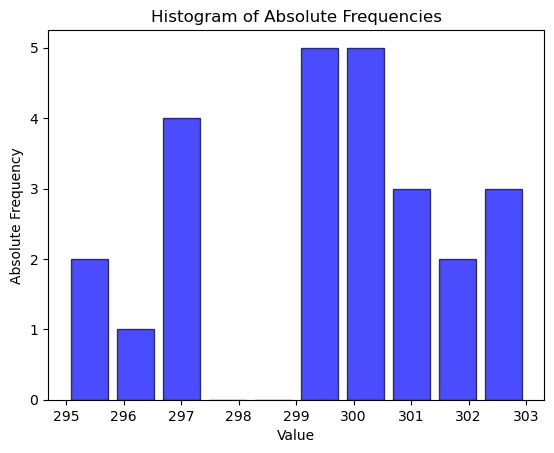

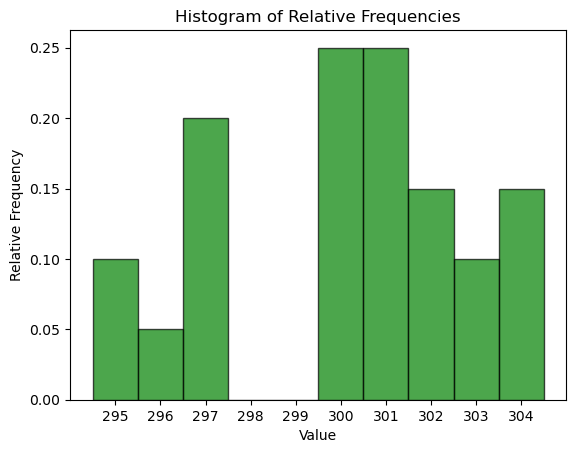

P(X < 301) = 0.68


In [25]:
#Ex 5
X = [299, 299, 297, 303, 299, 301, 300, 297, 302, 303, 300, 299, 301, 302, 301, 299, 300, 297, 300, 300, 296, 303, 295, 295, 297]

plt.hist(X, bins=10, rwidth=0.8, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Absolute Frequency')
plt.title('Histogram of Absolute Frequencies')
plt.show()

relative_frequencies = np.histogram(X, bins=10, range=(min(X), max(X)), density=True)[0]

plt.bar(range(295, 305), relative_frequencies, width=1.0, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Relative Frequency')
plt.title('Histogram of Relative Frequencies')
plt.xticks(range(295, 305))
plt.show()

probability_X_less_than_301 = sum(1 for x in X if x < 301) / len(X)
print("P(X < 301) =", probability_X_less_than_301)

In [4]:
#Ex 6
mean_length = 10
std_deviation = 1
simulations = 1000

screw_lengths = np.random.normal(mean_length, std_deviation, simulations)

probability_shorter_than_9 = np.mean(screw_lengths < 9)

probability_between_8_9_and_10_1 = np.mean((screw_lengths >= 8.9) & (screw_lengths <= 10.1))

print(f"The probability the length to be shorter than 9 is: {probability_shorter_than_9}")
print(f"The probability the length to be between 8.9 and 10.1 is: {probability_between_8_9_and_10_1}")

theoretical_probability_shorter_than_9 = norm.cdf(9, loc=mean_length, scale=std_deviation)

theoretical_probability_between_8_9_and_10_1 = norm.cdf(10.1, mean_length, std_deviation) - norm.cdf(8.9, mean_length, std_deviation)

print(f"The theoretical probability the length to be shorter than 9 is: {theoretical_probability_shorter_than_9}")
print(f"The theoretical probability the length to be between 8.9 and 10.1 is: {theoretical_probability_between_8_9_and_10_1}")

The probability the length to be shorter than 9 is: 0.17
The probability the length to be between 8.9 and 10.1 is: 0.385
The theoretical probability the length to be shorter than 9 is: 0.15865525393145707
The theoretical probability the length to be between 8.9 and 10.1 is: 0.40416177633064615


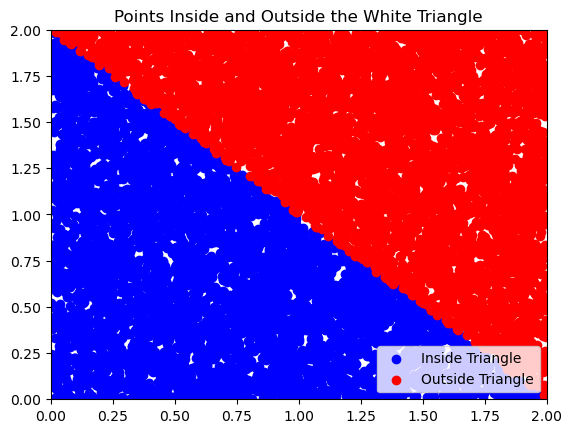

Estimated Probability (Simulation): 0.4971
Theoretical probability: 0.5


In [8]:
total_points = 10000
square_area = 2 * 2
triangle_area = 0.5 * 2 * 2

x = np.random.uniform(0, 2, total_points)
y = np.random.uniform(0, 2, total_points)

inside_triangle = (x + y <= 2)

estimated_probability = np.mean(inside_triangle)

plt.scatter(x[inside_triangle], y[inside_triangle], color='blue', label='Inside Triangle')
plt.scatter(x[~inside_triangle], y[~inside_triangle], color='red', label='Outside Triangle')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.legend()
plt.title("Points Inside and Outside the White Triangle")
plt.show()

print(f"Estimated Probability (Simulation): {estimated_probability:.4f}")

theoretical_probability = triangle_area / square_area

print(f"Theoretical probability: {theoretical_probability}")


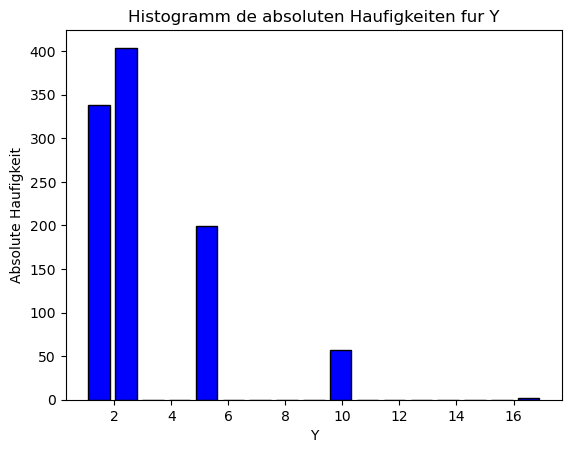

Geschatzte Wahrscheinlichkeit P(Y > 5): 0.059
Theoretische Wahrscheinlichkeit P(Y > 5): 0.0


In [15]:
#Ex 8
n = 4
p = 0.25
simulations = 1000
X_values = np.random.binomial(n, p, simulations)
Y_values = X_values**2 + 1

plt.hist(Y_values, bins=max(Y_values), rwidth=0.8, color='blue', edgecolor='black')
plt.xlabel('Y')
plt.ylabel('Absolute Haufigkeit')
plt.title('Histogramm de absoluten Haufigkeiten fur Y')
plt.show()

estimated_probability = np.mean(Y_values > 5)

theoretical_probability = 1 - binom.cdf(5, n, p)

print(f"Geschatzte Wahrscheinlichkeit P(Y > 5): {estimated_probability}")
print(f"Theoretische Wahrscheinlichkeit P(Y > 5): {theoretical_probability}")

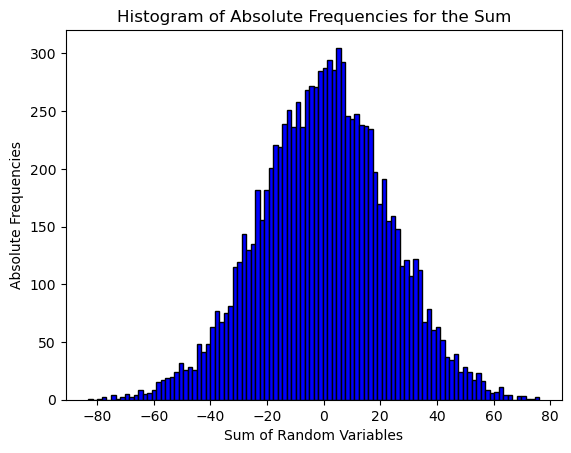

Estimated Probability: 0.059
Theoretical Probability: 0.5129071077706373


In [16]:
#Ex 9

num_variables = 500
simulations = 10000

sums = np.random.normal(0, 1, (simulations, num_variables)).sum(axis=1)

plt.hist(sums, bins=100, color='blue', edgecolor='black')
plt.xlabel("Sum of Random Variables")
plt.ylabel("Absolute Frequencies")
plt.title("Histogram of Absolute Frequencies for the Sum")
plt.show()

probability_estimated = np.mean((sums < -20) | (sums > 10))

probability_theoretical = norm.cdf(-20, loc=0, scale=np.sqrt(num_variables)) + (1 - norm.cdf(10, loc = 0, scale=np.sqrt(num_variables)))

print(f"Estimated Probability: {estimated_probability}")
print(f"Theoretical Probability: {probability_theoretical}")

In [18]:
#Ex 10

mean = 3
variance = 4
simulations = 10000

X_values = np.random.normal(mean, np.sqrt(variance), simulations)

estimated_probability = np.mean(np.abs(X_values) > 4)

print(f"Estimated Probability: {estimated_probability}")

theoretical_probability = 2 * (1 - norm.cdf(4, loc=mean, scale=np.sqrt(variance)))

print(f"Theoretical Probability: {theoretical_probability}")


Estimated Probability: 0.3067
Theoretical Probability: 0.6170750774519738


In [19]:
#Ex 11

total_simulations = 10000
desired_sequence = ["rot", "weiss", "blau", "blau"]
urn = ["rot"] * 6 + ["weiss"] * 4 + ["blau"] * 10

count_success_a = 0

for _ in range(total_simulations):
    drawn_balls = [random.choice(urn) for _ in range(4)]
    if drawn_balls == desired_sequence:
        count_success_a += 1
        
probability_estimated_a = count_success_a / total_simulations

count_success_b = 0

for _ in range(total_simulations):
    urn_copy = urn.copy()
    drawn_balls = []
    for _ in range(4):
        ball = random.choice(urn_copy)
        drawn_balls.append(ball)
        urn_copy.remove(ball)
    if drawn_balls == desired_sequence:
        count_success_b += 1
        
probability_estimated_b = count_success_b / total_simulations

probability_theoretical_a = (urn.count("rot") / len(urn)) * (urn.count("weiß") / len(urn)) * (urn.count("blau") / len(urn)) * (urn.count("blau") / len(urn))

probability_theoretical_b = (urn.count("rot") / len(urn)) * (urn.count("weiß") / (len(urn) - 1)) * (urn.count("blau") / (len(urn) - 2)) * (urn.count("blau") / (len(urn) - 3))


print(f"(a) Geschätzte Wahrscheinlichkeit (mit Zurücklegen): {probability_estimated_a:.4f}")
print(f"(b) Geschätzte Wahrscheinlichkeit (ohne Zurücklegen): {probability_estimated_b:.4f}")
print(f"Theoretische Wahrscheinlichkeit (mit Zurücklegen): {probability_theoretical_a:.4f}")
print(f"Theoretische Wahrscheinlichkeit (ohne Zurücklegen): {probability_theoretical_b:.4f}")

(a) Geschätzte Wahrscheinlichkeit (mit Zurücklegen): 0.0146
(b) Geschätzte Wahrscheinlichkeit (ohne Zurücklegen): 0.0185
Theoretische Wahrscheinlichkeit (mit Zurücklegen): 0.0000
Theoretische Wahrscheinlichkeit (ohne Zurücklegen): 0.0000


In [20]:
#Ex 12

simulations = 100000
results = []

for _ in range(simulations):
    rolls = np.random.choice([1, 2], size=2, replace=True)
    results.append(sum(rolls))
    
expected_sum_estimated = np.mean(results)

probability_estimated = np.mean(np.array(results) > 2)

print(f"Estimated expected sum: {expected_sum_estimated}")
print(f"Estimated probability: {probability_estimated}")

Estimated expected sum: 2.99932
Estimated probability: 0.75008
